In [1]:
# External Modules
from graphviz import Digraph
import numpy as np
import hashlib

#https://stackoverflow.com/questions/33433274/anaconda-graphviz-cant-import-after-installation#33433735

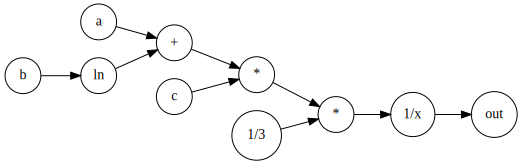

In [2]:
# creating empty graph ad set some attributes
f = Digraph('computational_graph', filename='graph_clean.gv')
f.attr(rankdir='LR')
f.attr('node', shape='circle')

# create the graph
f.node('a')
f.node('b')
f.node('c')
f.edge('a', '+', label='')
f.edge('b', 'ln', label=' ')
f.edge('ln', '+', label=' ')
f.edge('+','* ', label=' ')
f.edge('c','* ')
f.edge('* ', '*')
f.edge('1/3 ', '*')
f.edge('*','1/x')
f.edge('1/x','out')

f

In [43]:
import torch
import numpy as np 
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms

In [62]:
no_grad1 = torch.randn(2,2)
no_grad2 = torch.randn(2,2)
print(no_grad1, "\n", no_grad2)
print(no_grad1.requires_grad)
print(no_grad2.requires_grad)

z = no_grad1 + no_grad2
print(z)

print("Operation: ", z.grad_fn)

#scegliiiiiii
x = torch.ones(2, 2, requires_grad=True)
print(x)
y = x + 2
print(y)
print(y.grad_fn)
z = y * y * 3
out = z.mean()
print(z, out)
out.backward()
print(x.grad)

tensor([[-1.1055, -1.0965],
        [ 0.3399,  0.4621]]) 
 tensor([[ 1.2610,  0.7336],
        [-0.1457, -0.6714]])
False
False
tensor([[ 0.1555, -0.3629],
        [ 0.1942, -0.2092]])
Operation:  None
tensor([[ 1.,  1.],
        [ 1.,  1.]])
tensor([[ 3.,  3.],
        [ 3.,  3.]])
tensor([[ 27.,  27.],
        [ 27.,  27.]]) tensor(27.)
tensor([[ 4.5000,  4.5000],
        [ 4.5000,  4.5000]])


In [4]:
a = torch.tensor(2., requires_grad=True)
b = torch.tensor(np.e, requires_grad=True)
c = torch.tensor(3., requires_grad=True)
ln = torch.log(b)
print(a)
print(b)
print(c)
print(ln)

print(a.grad_fn)
print(b.grad_fn)
print(c.grad_fn)

tensor(2.)
tensor(2.7183)
tensor(3.)
tensor(1.0000)
None
None
None


## Welche Operation für Ableitung?

In [5]:
print(ln.grad_fn)

In [6]:
s = a + ln
print("1st computation", s)
print(s.grad_fn)

None
1st computation tensor(3.)


In [7]:
mul1 = c*s
print("2nd computation", mul1)
print(mul1.grad_fn)

None
2nd computation tensor(9.)


In [8]:
mul2 = 1./3. * mul1
print("3rd computation", mul2)
print(mul2.grad_fn)

None
3rd computation tensor(3.)


In [9]:
out = 1./mul2
print(out.grad_fn)

In [10]:
print("Forward pass: ", out) #1./3.

Forward pass:  tensor(0.3333)


In [11]:
out.backward(retain_graph=True)

In [13]:
print("Partielle Ableitung nach a: ", a.grad)
print("Partielle Ableitung nach b: ", b.grad)
print("Partielle Ableitung nach c: ", c.grad)

Partielle Ableitung nach a:  tensor(4.8889)
Partielle Ableitung nach b:  tensor(1.7985)
Partielle Ableitung nach c:  tensor(3.8889)
None


In [25]:
#https://www.kdnuggets.com/2018/05/simple-derivatives-pytorch.html

In [26]:
def irgendEineFunction(x):
    return 5*x**4 + 3*x**3 + 7*x**2 + 9*x -5

In [31]:
x = torch.tensor([2], requires_grad=True)

In [32]:
y = irgendEineFunction(x)

In [33]:
print(y)

tensor([ 145])


In [34]:
y.backward(retain_graph=True)

In [35]:
x.grad

tensor([ 233])

In [36]:
#https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/pytorch_basics/main.py

In [37]:
# Create tensors.
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)


In [38]:
# Build a computational graph.
y = w * x + b # y = 2 * x + 3

In [39]:
# Compute gradients.
y.backward()

In [40]:
# Print out the gradients.
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad) # b.grad = 1 

tensor(2.)
tensor(1.)
tensor(1.)


In [41]:
# ================================================================== #
#                    2. Basic autograd example 2                     #
# ================================================================== #

In [44]:
# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

# Build a fully connected layer.
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# Forward pass.
pred = linear(x)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.item())

# Backward pass.
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

# 1-step gradient descent.
optimizer.step()

# You can also perform gradient descent at the low level.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())


w:  Parameter containing:
tensor([[-0.0948,  0.2520, -0.1484],
        [-0.2826, -0.0872,  0.5404]])
b:  Parameter containing:
tensor([ 0.5576, -0.4158])
loss:  1.1765096187591553
dL/dw:  tensor([[ 0.4439, -0.0598,  0.3561],
        [ 0.0297, -0.3376,  1.2429]])
dL/db:  tensor([ 0.2243, -0.2208])
loss after 1 step optimization:  1.1558144092559814
